<a href="https://colab.research.google.com/github/Shruti1724/titanic_dataset/blob/main/titanic_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np


df = pd.read_csv('/content/Titanic-Dataset.csv')


df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.isnull().sum()

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [23]:
df.dtypes


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [24]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

df = df.drop(columns=['Name', 'Ticket'])

In [25]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,NaN,False,True
1,2,1,1,1,38.0,1,0,71.2833,C85,False,False
2,3,1,3,1,26.0,0,0,7.9250,NaN,False,True
3,4,1,1,1,35.0,1,0,53.1000,C123,False,True
4,5,0,3,0,35.0,0,0,8.0500,NaN,False,True
5,6,0,3,0,28.0,0,0,8.4583,NaN,True,False
6,7,0,1,0,54.0,0,0,51.8625,E46,False,True
7,8,0,3,0,2.0,3,1,21.0750,NaN,False,True
8,9,1,3,1,27.0,0,2,11.1333,NaN,False,True
9,10,1,2,1,14.0,1,0,30.0708,NaN,False,False


In [28]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
cols_to_scale = ['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']

scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df[cols_to_scale].describe()

,Age,Fare,Parch,SibSp,Pclass
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-2.791133e-17,3.987333e-18,5.283216e-17,1.594933e-17,4.386066e-17
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-2.224156e+00,-6.484217e-01,-4.736736e-01,-4.745452e-01,-1.566107e+00
25%,-5.657365e-01,-4.891482e-01,-4.736736e-01,-4.745452e-01,-3.693648e-01
50%,-1.046374e-01,-3.573909e-01,-4.736736e-01,-4.745452e-01,8.273772e-01
75%,4.333115e-01,-2.424635e-02,-4.736736e-01,4.327934e-01,8.273772e-01
max,3.891554e+00,9.667167e+00,6.974147e+00,6.784163e+00,8.273772e-01


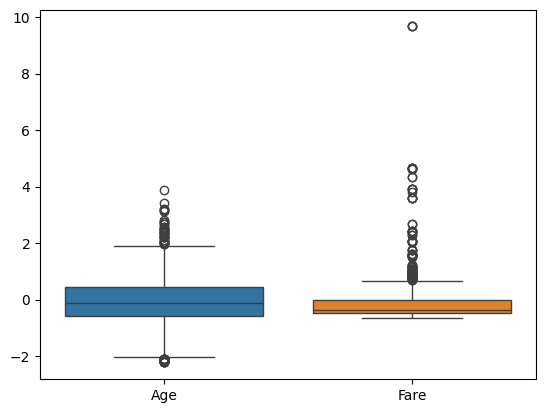

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(data=df[['Age', 'Fare']])
plt.show()


In [30]:
df.to_csv('cleaned_titanic.csv', index=False)

In [31]:
from google.colab import files
files.download('cleaned_titanic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>